---
title: Clustering
format:
  html:
    css: h1
    embed-resources: true
    code-fold: true
---

In [20]:
import pandas as pd
df=pd.read_csv('../../data/Clean_Data_project_Pub.Transport_5000/EPA_SmartLocationDatabase_V3_Jan_2021_Clean.csv')


In [14]:
from sklearn.preprocessing import StandardScaler

# normalize every column of the dataframe df
scaler = StandardScaler()
df_scaled = (scaler.fit_transform(df))

In [15]:
df_scaled

array([[ 0.68622878,  0.75139641,  0.72054183, ...,  1.01930298,
        -0.35112429, -0.06898827],
       [ 0.68622878,  0.75139641,  0.72054183, ...,  0.29531833,
        -0.34044363, -0.0686973 ],
       [ 0.68622878,  0.75139641,  0.72054183, ..., -0.2762485 ,
        -0.38802076, -0.06928549],
       ...,
       [-0.69107081, -0.67915784, -0.68114777, ..., -0.50487523,
        -0.38126376, -0.0691996 ],
       [-0.69107081, -0.67915784, -0.68114777, ..., -1.26696434,
         0.0087999 , -0.05329459],
       [-0.69107081, -0.67915784, -0.68114777, ..., -1.11454651,
        -0.33075737, -0.06850056]])

In [11]:
# Libraries for clustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances, silhouette_score
import pandas as pd

## k-means++

In [16]:
inertia_values = []
distortion_values = []

for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    cluster_assignments = kmeans.predict(df_scaled)
    centers = kmeans.cluster_centers_
    distortion = sum(np.min(pairwise_distances(df_scaled, centers, metric='euclidean'), axis=1)) / df_scaled.shape[0]
    distortion_values.append(distortion)

kmeans_df = pd.DataFrame({'Clusters': range(1, 40), 'Distortion': distortion_values, 'Inertia': inertia_values})

print(kmeans_df)

    Clusters  Distortion       Inertia
0          1    5.947283  1.567254e+07
1          2    5.442291  1.438002e+07
2          3    5.387453  1.340551e+07
3          4    5.209756  1.281327e+07
4          5    5.205517  1.225636e+07
5          6    5.000645  1.179125e+07
6          7    5.053200  1.123879e+07
7          8    4.990364  1.076965e+07
8          9    4.980376  1.031742e+07
9         10    4.931528  1.005151e+07
10        11    4.854808  9.776845e+06
11        12    4.747632  9.569428e+06
12        13    4.751885  9.344415e+06
13        14    4.720352  9.081983e+06
14        15    4.683612  8.926758e+06
15        16    4.628865  8.750473e+06
16        17    4.572890  8.585398e+06
17        18    4.568782  8.337635e+06
18        19    4.579223  8.198614e+06
19        20    4.585187  8.046608e+06
20        21    4.466414  7.944140e+06
21        22    4.494016  7.737475e+06
22        23    4.451415  7.612116e+06
23        24    4.490546  7.429404e+06
24        25    4.380493 

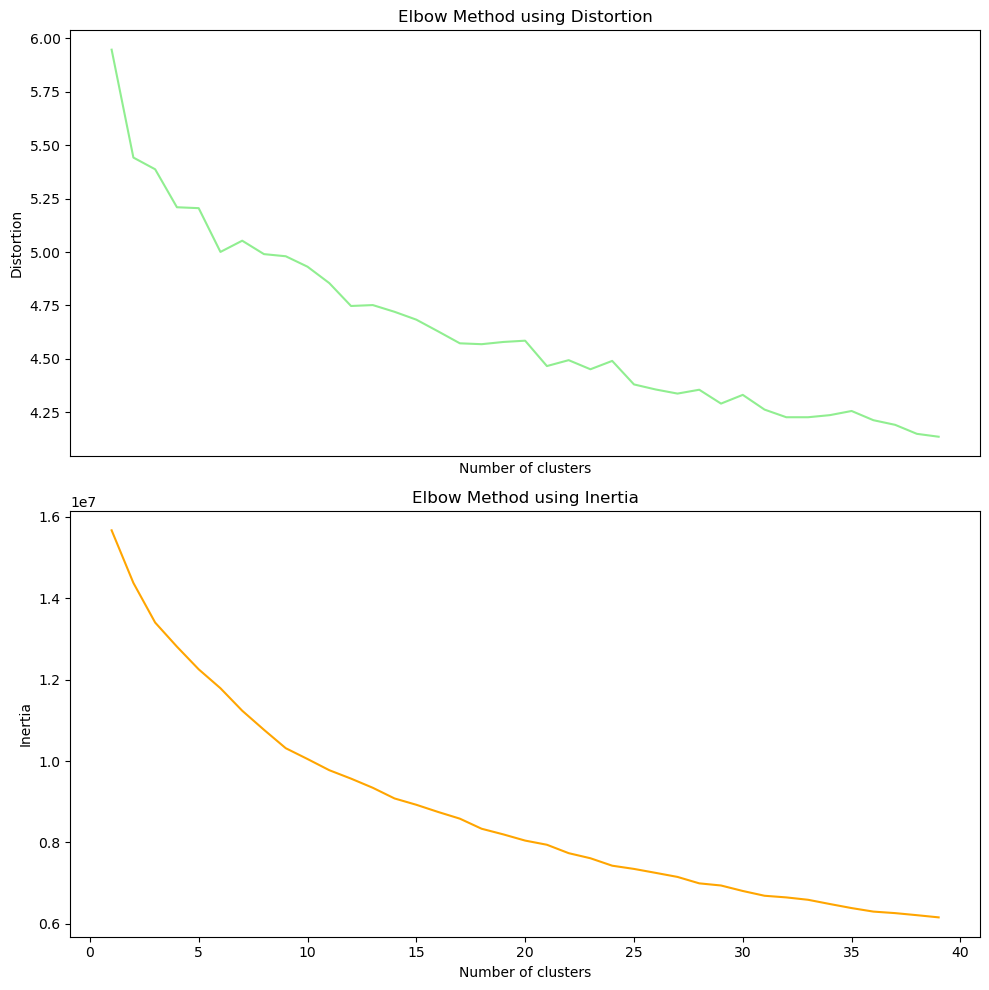

In [51]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot Distortion
axs[0].plot(kmeans_df['Clusters'], kmeans_df['Distortion'], marker='', linestyle='-', color='lightgreen')
axs[0].set_title('Elbow Method using Distortion')
axs[0].set_ylabel('Distortion')
axs[0].set_xlabel('Number of clusters')
axs[0].set_xticks([])

# Plot Inertia
axs[1].plot(kmeans_df['Clusters'], kmeans_df['Inertia'], marker='', linestyle='-', color='orange')
axs[1].set_title('Elbow Method using Inertia')
axs[1].set_ylabel('Inertia')
axs[1].set_xlabel('Number of clusters')

plt.tight_layout()
plt.show()

The biggest inertia score is set at 11 cluster. Thus, we will pick 11 clusters for this data using k_means++ and compare it to a few other methods.

In [9]:
#give me the shape of df_norm
print(df_norm.shape)

(220740, 71)


## Mean shift on dimensionality reduced data

In [3]:
scores_pca_df=pd.read_csv('../../data/Clean_Data_project_Pub.Transport_5000/scores_pca.csv')

In [4]:
samples = scores_pca_df.sample(n=5000, random_state=1)

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward') #chose 3 as that is the number of species. We could have changed it.
labels = hierarchical_cluster.fit_predict(samples)
print("Cluster Labels total:")
print(list(set(labels)))


/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster Labels total:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
scores_pca_df=pd.read_csv('../../data/Clean_Data_project_Pub.Transport_5000/scores_pca.csv')

samples = scores_pca_df.sample(n=10000, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score
import random

random.seed(42)
best_scores = []
epsilons = []
clusters = []
z = [i / 10 for i in range(5, 20)]
z2 = range(2, 10)

for i in z:
    max_score = -1
    best_cluster = -1
    best_eps = -1
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        predics = model.fit_predict(samples)
        num_clusters = len(pd.Series(predics).unique())
        if num_clusters > 1:
            score = silhouette_score(samples, predics)
            if score > max_score:
                max_score = score
                best_cluster = num_clusters
                best_eps = i

    best_scores.append(max_score)
    clusters.append(best_cluster)
    epsilons.append(best_eps)

db = pd.DataFrame({'Epsilons': epsilons, 'Best_Clusters': clusters, 'Best_Silhouette': best_scores})
print(db.sort_values(by="Best_Silhouette", ascending=False))

sns.lineplot(data=db, x='Clusters',y='Silhouette')
plt.show()


In [ ]:
# Perform MeanShift Clustering and predict number 
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(samples)

clustering_meanshift = MeanShift(bandwidth=bandwidth, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
clustering_meanshift.fit(samples)
predics = clustering_meanshift.predict(samples)
print('Number of estimated clusters : ', len(np.unique(predics)))